In [16]:
#All imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [17]:
#converting an excel to a .csv 
#def convert_excel_to_csv():
#    data = pd.read_excel("matrix.xlsx", header=0)
#    data.to_csv("test_data/matrix.csv", index = None, header=True)
#convert_excel_to_csv()

In [18]:
#Read the dataset
matrix = np.array(pd.read_csv("test_data/matrix.csv"))
#matrix = np.delete(matrix, 0, 1)
print(matrix)

[[1 1 1 1 1 1]
 [0 1 1 1 1 1]
 [0 0 1 1 1 1]
 [0 1 1 1 1 0]
 [0 0 0 1 1 1]
 [0 0 0 0 1 1]]


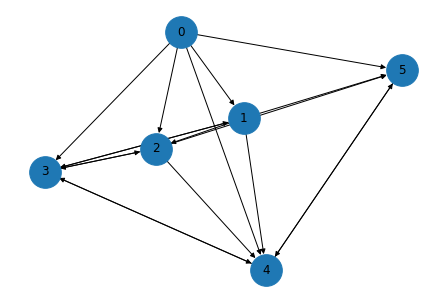

In [19]:
def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.DiGraph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=1000, with_labels=True)
    plt.show()

show_graph_with_labels(matrix)

In [20]:
def _not_complete(matrix, i, j): 
    return matrix[i][j] == matrix[j][i] == 0
#Complete Check
def complete_check(matrix):
    rows = matrix.shape[0]
    cols = matrix.shape[1]
    for i in range(rows):
        for j in range(cols):
            if _not_complete(matrix, i, j):
                #print(i, j, ", ", matrix[i][j], ", ", matrix[j][i])
                return False
    return True

#Test completeness with two cases
print(complete_check(matrix))
print(complete_check(np.array([[1,1,1], [1,1,1], [1,1,1]])))

False
True


In [21]:
def reflexive(matrix):
    rows = matrix.shape[0]
    cols = matrix.shape[1]
    for i in range(rows):
            if matrix[i][i] == 0:
                return False
    return True
#Following should be True
print(reflexive(matrix))
#Following should be False
print(reflexive(np.array([[0,0,0], [0,1,0], [0,0,1]])))

True
False


In [22]:
def _not_asymetric(matrix, i, j): 
    return matrix[i][j] == 1 and matrix[j][i] == 1
#asymmetricity check 
def asymetric_check(matrix):
    rows = matrix.shape[0]
    cols = matrix.shape[1]
    for i in range(rows):
        for j in range(cols):
            if _not_asymetric(matrix, i, j): 
                return False
    return True
asymetric_check(matrix)

False

In [23]:
def symmetric_check(matrix):
    rows = matrix.shape[0]
    cols = matrix.shape[1]
    for i in range(rows):
        for j in range(cols):
            if matrix[i][j] != matrix[j][i]:
                return False
    return True
symmetric_check(matrix)

False

In [24]:
def _not_antisymmetric(matrix, i, j): 
    return i!=j and matrix[i][j] == 1 and matrix[j][i] == 1
#asymmetricity check 
#if for every x, y ∈ X, [x R y and y R x =⇒ x = y];
def antisymmetric_check(matrix):
    rows = matrix.shape[0]
    cols = matrix.shape[1]
    for i in range(rows):
        for j in range(cols):
            if _not_antisymmetric(matrix, i, j): 
                return False
    return True
antisymmetric_check(matrix)

False

In [25]:
def _not_transitive(matrix, i, j, k): 
    return matrix[i][j]==1 and matrix[j][k]==1 and matrix[i][k]==0
#Build a Python function TransitiveCheck testing if a binary relation is transitive.k
def transitive_check(matrix):
    rows = matrix.shape[0]
    cols = matrix.shape[1]
    for i in range(rows):
        for j in range(cols):
            for k in range(cols):
                if _not_transitive(matrix, i, j, k):
                    return False
    return True
transitive_check(matrix)

False

In [26]:
#Build a Python function NegativeTransitiveCheck testing if a binary relation is negatively transitive.
def negative_transitive_check(matrix):
    rows = matrix.shape[0]
    cols = matrix.shape[1]
    for i in range(rows):
        for j in range(cols):
            for k in range(cols):
                if matrix[i][j]==0 and matrix[j][k]==0 and matrix[i][k]==1:
                    return False
    return True
negative_transitive_check(matrix)

False

In [27]:
# Build a Python function CompleteOrderCheck testing if a binary relation is a total order. 
# We don't chain the functions defined previously but use their condition as we can identify and terminate earlier in case of 
# conditions are not met ->?
# We don't have to analyze the whole matrix for completeness after the first failed antisymmetricity check. 
def complete_order_check(matrix):
    rows = matrix.shape[0]
    cols = matrix.shape[1]

    for i in range(rows):
        for j in range(cols):
    # if it's not complete return false
            if _not_complete(matrix, i, j):
                return False
    # if it's not antisymmetric return false
            if _not_antisymmetric(matrix, i, j):
                    return False
    # if it's not transitive return false
            for k in range(cols):
                if _not_transitive(matrix, i, j, k):
                    return False
                
    return True
complete_order_check(matrix)

False

In [28]:
# Build a Python function CompletePreOrderCheck testing if a binary relation is a complete preorder. 
# We don't chain the functions defined previously but use their condition as we can identify and terminate earlier in case of 
# conditions are not met
# We don't have to analyze the whole matrix for completeness after the first failed transitivity check. 
def complete_preorder_check(matrix):
    rows = matrix.shape[0]
    cols = matrix.shape[1]
    for i in range(rows):
        for j in range(cols):
    # if it's not complete return false
            if _not_complete(matrix, i, j):
                return False
    # if it's not transitive return false
            for k in range(cols):
                if _not_transitive(matrix, i, j, k):
                    return False
                
    return True
complete_preorder_check(matrix)

False

In [29]:
#returns the strincness relation over the given relation -> ?
def strictness_relationship(matrix):
    rows = matrix.shape[0]
    cols = matrix.shape[1]
    outputmatrix = np.zeros((rows, cols), dtype=int)
    for i in range(rows):
        for j in range(cols):
            if matrix[i][j] == 1 and matrix[j][i] == 0:
                 outputmatrix[i][j] = matrix[i][j]
    return outputmatrix
strictness_relationship(matrix)

array([[0, 1, 1, 1, 1, 1],
       [0, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [30]:
#returns the indifference relation over the given relation
def indifference_relationship(matrix):
    rows = matrix.shape[0]
    cols = matrix.shape[1]
    outputmatrix = np.zeros((rows, cols), dtype=int)
    for i in range(rows):
        for j in range(cols):
            if matrix[i][j] == 1 and matrix[j][i] == 1:
                 outputmatrix[i][j] = matrix[i][j]
    return outputmatrix
indifference_relationship(matrix)

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 1, 1]])

In [31]:
#returns a topological sorting of the relation
def topological_sorting(matrix):
    rows = matrix.shape[0]
    cols = matrix.shape[1]
    #find the number of in-degrees for each vertex (the sum of elements per column)
    in_degrees = [0] * cols #
    for i in range(rows):
        for j in range(cols):
            in_degrees[j]+=matrix[i][j]
    #number of already visited nodes
    visited_nodes=0
    #queue of visited nodes
    queue = []
    #queue for the output nodes
    output_queue = []
    #add the nodes with in-degree 0 to the queue
    for i in range(cols):
        if in_degrees[i]==0:
            queue.append(i)
    #for each element visited Increment count of visited nodes by 1. Then decrease in-degree by 1 for all its neighboring nodes.
    while queue!=[]:
        element_being_visited=queue.pop(0)
        output_queue.append(element_being_visited)
        visited_nodes+=1
        for j in range(cols):
            if matrix[element_being_visited][j]==1:
                in_degrees[j]-=1
    # If the in-degree of a neighboring nodes is reduced to zero, then add it to the queue
                if in_degrees[j]==0:
                    queue.append(j)
    #If count of visited nodes is not equal to the number of nodes in the graph then the topological sort is not possible 
    #for the given graph.
    if visited_nodes!=cols:
        print("Topological ordering isn't possible for this graph")
    else: 
        print(output_queue)
        
topological_sorting(matrix)
    
        
    
            
            
        

Topological ordering isn't possible for this graph


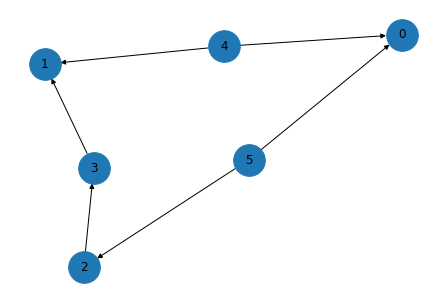

[4, 5, 0, 2, 3, 1]


In [32]:
DAG = np.array([[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0],
                              [0, 1, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0] ])
show_graph_with_labels(DAG)
topological_sorting(DAG)